<a href="https://colab.research.google.com/github/danielgrgurevic/Desafios_Bootcamp_DL/blob/main/Desaf%C3%ADo_Clasificaci%C3%B3n_de_calidad_de_ramen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. IMPORTACIÓN Y LIMPIEZA DE DATOS

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("/content/drive/MyDrive/Data science/Desafío Latam/5 - Machine Learning /Desafío 4/ramen-ratings.xlsx")

In [3]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review #  2580 non-null   int64 
 1   Brand     2580 non-null   object
 2   Variety   2580 non-null   object
 3   Style     2578 non-null   object
 4   Country   2580 non-null   object
 5   Stars     2580 non-null   object
 6   Top Ten   41 non-null     object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


In [5]:
# Convertir la columna 'Stars' a tipo float
df['Stars'] = pd.to_numeric(df['Stars'], errors='coerce')

# Definir un umbral: 1 para "bueno" (>= 4 estrellas), 0 para "malo" (< 4 estrellas)
df['Stars_bin'] = df['Stars'].apply(lambda x: 1 if x >= 4 else 0)

print(df[['Stars', 'Stars_bin']])

      Stars  Stars_bin
0      3.75          0
1      1.00          0
2      2.25          0
3      2.75          0
4      3.75          0
...     ...        ...
2575   3.50          0
2576   1.00          0
2577   2.00          0
2578   2.00          0
2579   0.50          0

[2580 rows x 2 columns]


In [6]:
# Eliminar la columna 'Stars'
df = df.drop(columns=['Stars'])

In [7]:
# Ver los valores únicos y sus conteos en la columna 'Top Ten'
top_ten_values = df['Top Ten'].value_counts(dropna=False)

print(top_ten_values)


Top Ten
NaN         2539
\n             4
2012 #10       1
2014 #1        1
2013 #1        1
2013 #2        1
2013 #4        1
2013 #9        1
2013 #3        1
2012 #7        1
2014 #5        1
2012 #5        1
2012 #3        1
2012 #6        1
2012 #9        1
2012 #1        1
2012 #2        1
2013 #6        1
2014 #6        1
2014 #8        1
2016 #10       1
2015 #4        1
2016 #1        1
2016 #8        1
2016 #5        1
2016 #9        1
2016 #7        1
2015 #10       1
2015 #7        1
2015 #9        1
2014 #10       1
2015 #6        1
2015 #1        1
2013 #10       1
2015 #8        1
2014 #7        1
2014 #4        1
2014 #9        1
2012 #4        1
Name: count, dtype: int64


In [8]:
# Eliminar la columna 'Top Ten'
df = df.drop(columns=['Top Ten'])


In [9]:
df

,Review #,Brand,Variety,Style,Country,Stars_bin
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,0
4,2576,Ching's Secret,Singapore Curry,Pack,India,0
...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,Thailand,0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,0


In [10]:
from sklearn.preprocessing import LabelEncoder

# Inicializar LabelEncoder
label_encoder = LabelEncoder()

# Seleccionar las columnas categóricas que quieres codificar
categorical_columns = ['Brand', 'Variety', 'Style', 'Country']

# Aplicar LabelEncoder a cada columna categórica
for column in categorical_columns:
    df[column] = df[column].astype(str)  # Asegurarse de que los valores sean de tipo string
    df[column] = label_encoder.fit_transform(df[column])

In [11]:
df.head()

,Review #,Brand,Variety,Style,Country,Stars_bin
0,2580,190,2189,4,18,0
1,2579,119,1443,5,32,0
2,2578,192,454,4,35,0
3,2577,336,709,5,32,0
4,2576,38,1954,5,16,0


In [12]:
# Ver los valores únicos y sus conteos en la columna 'Top Ten'
stars_bin_values = df['Stars_bin'].value_counts(dropna=False)

stars_bin_values

,count
Stars_bin,
0,1453
1,1127


In [13]:
df.describe()

,Review #,Brand,Variety,Style,Country,Stars_bin
count,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000,2580.000000
mean,1290.500000,183.414341,1197.017054,4.113566,24.159690,0.436822
std,744.926171,88.052819,703.788962,1.565145,9.976868,0.496089
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,645.750000,133.000000,579.750000,4.000000,18.000000,0.000000
50%,1290.500000,192.000000,1188.500000,5.000000,29.000000,0.000000
75%,1935.250000,242.250000,1811.250000,5.000000,33.000000,1.000000
max,2580.000000,354.000000,2411.000000,7.000000,37.000000,1.000000


# 2- EXPLORACIÓN Y ANÁLISIS DE DATOS

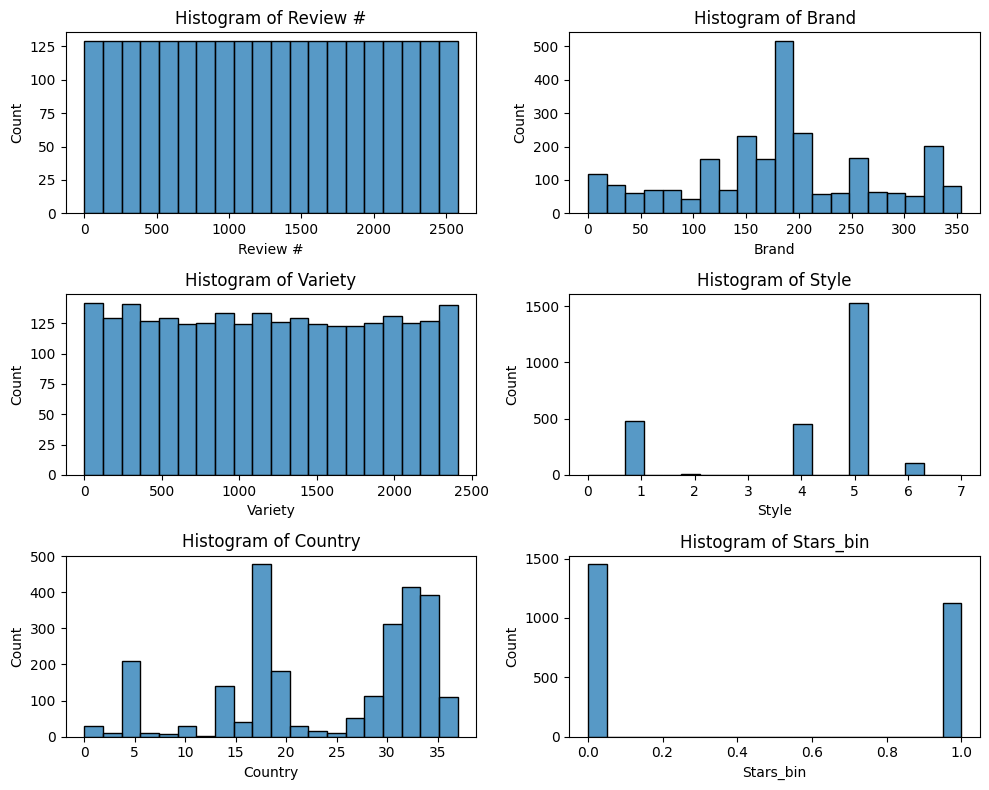

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un histograma para las columnas numéricas
numeric_columns = ['Review #', 'Brand', 'Variety', 'Style', 'Country', 'Stars_bin']

plt.figure(figsize=(10, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=False, bins=20)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

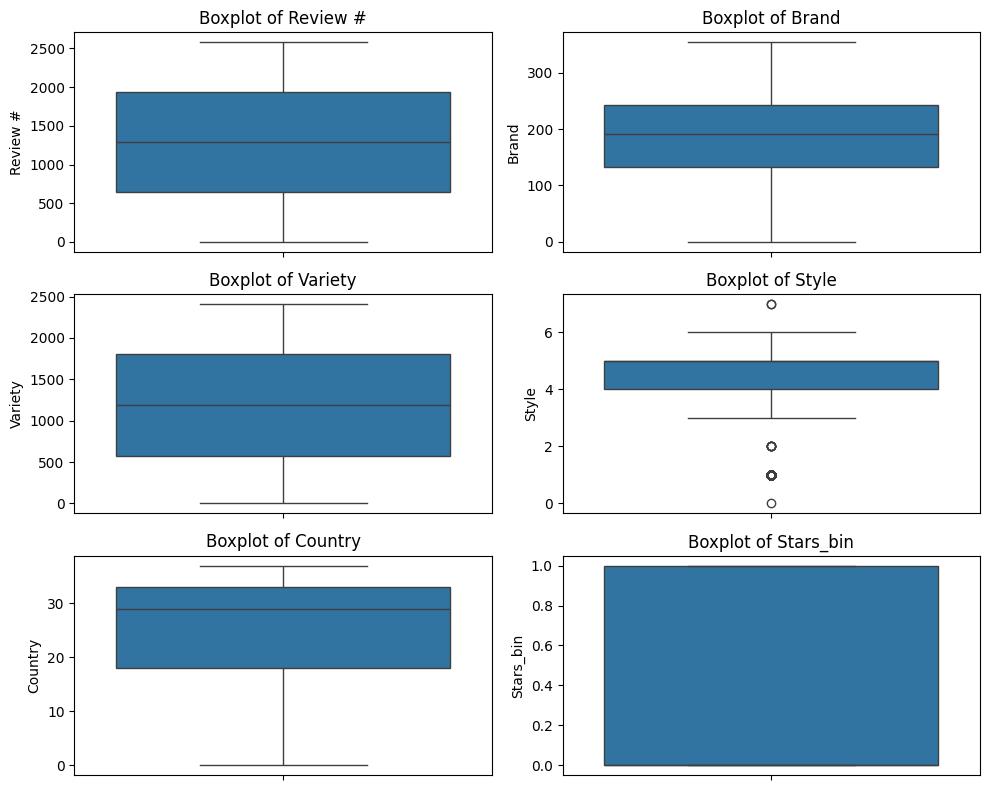

In [15]:
# Crear boxplots para las columnas numéricas
plt.figure(figsize=(10, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Review #   2580 non-null   int64
 1   Brand      2580 non-null   int64
 2   Variety    2580 non-null   int64
 3   Style      2580 non-null   int64
 4   Country    2580 non-null   int64
 5   Stars_bin  2580 non-null   int64
dtypes: int64(6)
memory usage: 121.1 KB


In [17]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas numéricas
numeric_columns = [ 'Brand', 'Variety', 'Country']

# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Escalar las variables numéricas
df_scaled = df.copy()  # Crear una copia del DataFrame original
df_scaled[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Mostrar el DataFrame escalado
df_scaled.head()


,Review #,Brand,Variety,Style,Country,Stars_bin
0,2580,0.074807,1.409762,4,-0.617517,0
1,2579,-0.731684,0.349580,5,0.786001,0
2,2578,0.097525,-1.055943,4,1.086755,0
3,2577,1.733224,-0.693548,5,0.786001,0
4,2576,-1.651765,1.075791,5,-0.818019,0


# 3.- ENTRENAMIENTO Y TESTING DE REGRESIÓN LOGÍSTICA

In [18]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y el objetivo (y) si tienes una variable objetivo
X = df_scaled.drop(columns=['Stars_bin','Review #'])
y = df_scaled['Stars_bin']

# Dividir el conjunto de datos en entrenamiento y prueba (80% - 20% por defecto)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar los tamaños de los conjuntos de entrenamiento y prueba
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")


Tamaño de X_train: (2064, 4)
Tamaño de X_test: (516, 4)
Tamaño de y_train: (2064,)
Tamaño de y_test: (516,)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# 1. Definir el modelo de regresión logística
logreg = LogisticRegression()

# 2. Definir el rango de hiperparámetros que queremos buscar
# El parámetro C controla la regularización (inversamente proporcional a la fuerza de la regularización)
param_grid = {
    'C': [0.01, 0.1, 1, 10]
}

# 3. Configurar el GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# 4. Entrenar el modelo en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# 5. Obtener el mejor modelo y sus parámetros
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print(f"Mejor parámetro C: {best_params['C']}")

# 6. Predecir en el conjunto de prueba
y_pred = best_model.predict(X_test)

# 7. Evaluar el rendimiento (puedes usar otras métricas también como F1, recall, etc.)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy * 100:.2f}%")


Mejor parámetro C: 0.01
Precisión del modelo en el conjunto de prueba: 52.33%


# 4.- ENTRENAMIENTO Y TESTING DE SVM

In [20]:
from sklearn.svm import SVC


# 1. Definir el modelo SVM
svm_model = SVC()

# 2. Definir el rango de hiperparámetros para C, gamma y kernel
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [ 0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# 3. Configurar el GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)

# 4. Entrenar el modelo en el conjunto de entrenamiento
grid_search_svm.fit(X_train, y_train)

# 5. Obtener el mejor modelo y sus parámetros
best_svm_model = grid_search_svm.best_estimator_
best_svm_params = grid_search_svm.best_params_

print(f"Mejores parámetros para SVM: {best_svm_params}")

# 6. Predecir en el conjunto de prueba
y_pred_svm = best_svm_model.predict(X_test)

# 7. Evaluar el rendimiento
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Precisión del modelo SVM en el conjunto de prueba: {accuracy_svm * 100:.2f}%")


Mejores parámetros para SVM: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}
Precisión del modelo SVM en el conjunto de prueba: 66.28%


#5.- COMPARACIÓN MDELOS

Mejor Regresión Logística: Precisión = 0.52, Recall = 0.06, Precision = 0.30, F1-Score = 0.10, AUC = 0.58
Mejor SVM: Precisión = 0.66, Recall = 0.59, Precision = 0.62, F1-Score = 0.61, AUC = 0.69


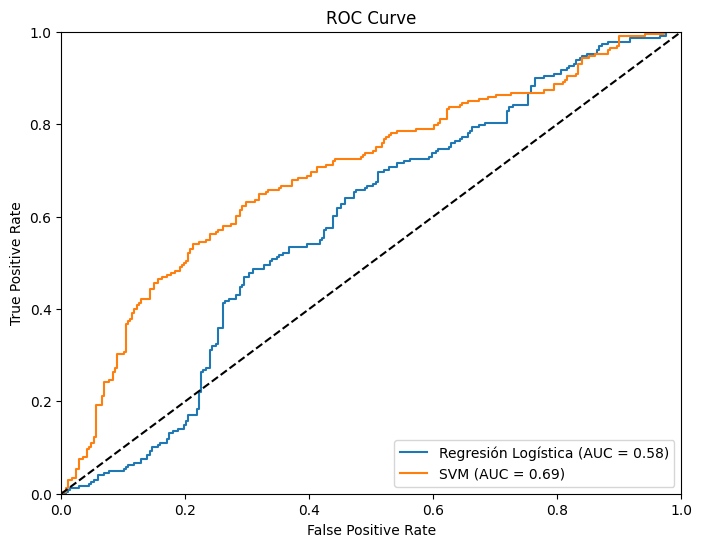

In [23]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Evaluar el rendimiento del mejor modelo de Regresión Logística
accuracy_logreg = accuracy_score(y_test, y_pred)
recall_logreg = recall_score(y_test, y_pred)
precision_logreg = precision_score(y_test, y_pred)
f1_logreg = f1_score(y_test, y_pred)
auc_logreg = roc_auc_score(y_test, best_model.decision_function(X_test))

# Evaluar el rendimiento del mejor modelo de SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, best_svm_model.decision_function(X_test))

# Imprimir los resultados para ambos modelos
print(f"Mejor Regresión Logística: Precisión = {accuracy_logreg:.2f}, Recall = {recall_logreg:.2f}, Precision = {precision_logreg:.2f}, F1-Score = {f1_logreg:.2f}, AUC = {auc_logreg:.2f}")
print(f"Mejor SVM: Precisión = {accuracy_svm:.2f}, Recall = {recall_svm:.2f}, Precision = {precision_svm:.2f}, F1-Score = {f1_svm:.2f}, AUC = {auc_svm:.2f}")

# Comparar ROC para ambos modelos
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, best_model.decision_function(X_test))
fpr_svm, tpr_svm, _ = roc_curve(y_test, best_svm_model.decision_function(X_test))

plt.figure(figsize=(8,6))
plt.plot(fpr_logreg, tpr_logreg, label=f"Regresión Logística (AUC = {auc_logreg:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


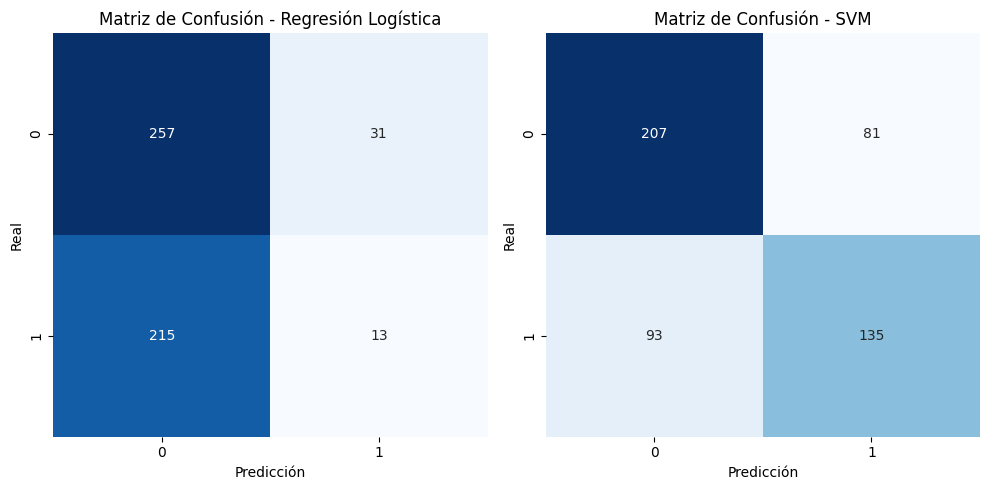

In [24]:
from sklearn.metrics import confusion_matrix

# Matriz de confusión para Regresión Logística
cm_logreg = confusion_matrix(y_test, y_pred)

# Matriz de confusión para SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Visualización de la Matriz de Confusión para Regresión Logística
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicción')
plt.ylabel('Real')

# Visualización de la Matriz de Confusión para SVM
plt.subplot(1, 2, 2)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - SVM')
plt.xlabel('Predicción')
plt.ylabel('Real')

plt.tight_layout()
plt.show()


Análisis de Resultados
Precisión: El modelo SVM tiene una precisión más alta (0.66) en comparación con la regresión logística (0.52), lo que significa que es más confiable en sus predicciones generales.

Recall: El SVM también supera al modelo de regresión logística en el recall (0.59 frente a 0.06). Esto es crucial si el objetivo es identificar correctamente la mayoría de los casos positivos, ya que el modelo de regresión logística no está capturando casi nada de los verdaderos positivos.

F1-Score: El F1-score del SVM (0.61) es significativamente mejor que el de la regresión logística (0.10).

AUC: El AUC del SVM (0.69) también es superior al de la regresión logística (0.58). Un AUC más alto indica que el modelo tiene una mejor capacidad para distinguir entre las clases positivas y negativas.

Conclusión
Basado en estas métricas, el modelo SVM es claramente más adecuado para resolver el problema en comparación con la regresión logística. Ofrece mejores resultados en términos de precisión, recall, F1-score y AUC, lo que sugiere que puede generalizar mejor a nuevos datos y es más efectivo en la identificación de la clase positiva.